# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.info() #데이터 정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Label       200 non-null    int64  
 1   bias        200 non-null    int64  
 2   experience  200 non-null    float64
 3   salary      200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0) 
#4:1의 비율로 훈련세트와 테스트세트의 데이터를 분리한다. 

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#훈련데이터와 테스트데이터의 형태 

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler #스탠다드 스케일링 사용 
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])
N

3

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.4124742 , 0.66112588, 0.40243527])

In [10]:
len(parameters)

3

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$
- 이는  로지스틱회귀함수(시그모이드함수)에서 exponential function을 취할 z값을 구하는 과정이다. 

In [11]:
def dot_product(X, parameters): #위에서 만든 파라미터값과 X데이터를 곱해주는 함수 
  z = 0
  for i in range(len(parameters)): #파라미터 개수만큼 
    z += X[i] * parameters[i] #곱한 값을 모두 더해준다.사실 이 X데이터를 X_train로 대입하면 오류가 발생한다..하지만 아래에서 1열만 뽑아서 대입할려면 
                              #이 문법을 이용해야한다,,,,  
  return z #z값 반환 

## Logistic Function

## $p = 1/(1+e^{-X_i \theta})$
- 시그모이드함수구현과정이다. 

In [12]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p = 1/(1+np.exp(-z))
    return p

In [13]:
logistic(X_train.iloc[1], parameters)

0.7710010434798316

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) =\Sigma\{y_i\log{p(X_i)} + (1-y_i)\log{(1-p(X_i))}\}$

In [14]:
def minus_log_cross_entropy_i(X, y, parameters): #크로스엔트로피 함수 구현 
    p = logistic(X,parameters) #예측값은 위에서 구한 로지스틱함수에 대입하여 구함 
    loss = (y*np.log(p)+(1-y)*np.log(1-p)) 
    return -loss #minus함수이므로 반환시에 마이너스 붙여서 반환 

In [15]:
def mse_i(X, y, parameters): #mse구현 함수 
  y_hat = np.dot(X, parameters.T) #X의 값과 파라미터값을 내적곱하여 예측값구하기 
  loss = ((y - y_hat)**2) / 2 #mse구하기 
  return loss 

In [51]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0 #loss초기값 = 0
    for i in range(X_set.shape[0]): #현재 배치의 데이터 수만큼 
        X = X_set.iloc[i,:] #한 행씩 뜯어내기 
        y = y_set.iloc[i] #
        loss += loss_function(X,y,parameters) #주어진 loss_function으로 손실값 구하기 
    loss = loss/n #loss 평균값으로 계산
    return loss

In [33]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.0720268948925868

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l =  -(p_i-y_i)X_j$


## ${\partial\over{\partial \theta_j}}l(p)= -\Sigma(y_i - p_i)x_{ij}$

In [34]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear': #선형회귀이면 
        y_hat = np.dot(X, parameters.T)
        gradient = -(y_hat - y)*X[j] #mse미분한 식에 대입 
    else: #로지스틱회귀이면 
        p =logistic(X,parameters)
        gradient = -(np.sum((y-p)*X[j])) #시그모이드 미분식에 대입 
    return gradient

In [35]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.09035110595798913

In [20]:
'''
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")
'''

'\nfrom IPython.display import Image\n\nImage("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")\n'

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [38]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))] #gradients 0으로 초기화 [0,0,0]
    
    for i in range(X_set.shape[0]): #X데이터의 행 개수만큼 반복 
        X = X_set.iloc[i,:] #행한개씩 추출 
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X,y,parameters,j,model) #변수에 모델에 따라 gradient계산, 업데이트 ,
    
    return gradients

In [41]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[45.05221078281435, 11.93363948972333, 41.40313909422338]

## mini-batch
인덱스로 미니 배치 나누기

In [42]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: X데이터의 길이를 입력받은 batch size로 나눈값에 +1을 더해 실행횟수(nb)를 구한다. 데이터의 길이만큼 0부터 채워진 숫자행렬(idx)를 만든다. idx_list는 idx안의 값을 입력받은 batchsize만큼 잘라 그룹화한 배열을 담은 리스트이다. 길이가 0이 되지 않을때까지 담는다. 만약 idx가 [0,1,2,3,4,5]이고 배치사이즈가 2라면  idx_list는 [[0,1].[2,3],[4,5]]가 된다. 

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [44]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n #gradients는 주어진 학습률을 곱해 업데이트한다. 단, 배치사이즈를 고려해 n으로 나눈값을 곱해준다. 
    
    parameters -= gradients
    return parameters

In [45]:
step(parameters, gradients1, 0.01, len(X_train)) 

array([0.40646231, 0.65953128, 0.39691049])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 현재 반복 횟수 
- num_epoch: 총 반복 횟수 
<br>

BGD: 학습 한번에 모든 데이터셋을 사용하여 기울기를 업데이트함  
SGD: 학습 한번에 임의의 1개의 데이터만 사용하여 기울기를 업데이트함  
MGD: 학습 한번에 데이터셋의 일부만 사용하여 기울기를 업데이트함 
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD 
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [48]:
X_train.iloc[0]

bias          1.000000
experience    0.187893
salary       -1.143335
Name: 0, dtype: float64

In [52]:
def gradient_descent(X_train, y_train,learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False 
    
    N = len(X_train.iloc[0]) #열길이 
    parameters = np.random.rand(N) #열길이 만큼의 파라미터 랜덤하게 설정 
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i #각 모델에 맞는 loss_function설정 
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size) #배치사이즈에 맞게 X_train을 나누어 각 세트를 생성 
    
    for epoch in range(num_epoch):
        if stopper: #stopper가 True가 되면 멈춤 
            break
        for idx in batch_idx_list: #각 세트마다 실행 
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model) #모델에 따른 gradient구하기 
            parameters = step(parameters, gradients, learning_rate, batch_size) #학습률에 따라 gradient업데이트 
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size) #업데이트된 gradient로 손실 다시 계산 
            
            #중단 조건
            if abs(new_loss - loss) < tolerance: #기존 손실과 새로구한 손실의 차가 tolerance보다 작아지면 멈추기 
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [53]:
new_param_bgd = gradient_descent(X_train, y_train,learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16)
new_param_bgd

epoch: 0  loss: 0.4762352742340976  params: [-0.02417868  0.68959289  0.53538638]  gradients: [0.02076183388180268, 0.01973254029241096, 0.025322567969645465]
epoch: 100  loss: 0.08220681838100412  params: [-1.48804839  3.00926332 -2.87138546]  gradients: [0.003354836483366668, 0.004764118221685121, 0.006113562546638625]
epoch: 200  loss: 0.0707842704486157  params: [-1.68722736  3.66437919 -3.48518741]  gradients: [0.0031841085572388173, 0.0046584468463331885, 0.005579342558094495]
epoch: 300  loss: 0.06675339749122423  params: [-1.77496747  3.9490285  -3.74927694]  gradients: [0.0031409656246797015, 0.004629084259520066, 0.005395429557614825]
epoch: 400  loss: 0.06492381829224998  params: [-1.81891319  4.09099948 -3.88043354]  gradients: [0.0031247978132224337, 0.004617533511031685, 0.005313012392485212]
epoch: 500  loss: 0.06400416819037406  params: [-1.84212843  4.16585897 -3.94944508]  gradients: [0.0031175168729930466, 0.004612187266162743, 0.005271862056935583]
epoch: 600  loss:

array([-1.86874448,  4.25157452, -4.02834347])

In [54]:
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.3, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16)
new_param_sgd

epoch: 0  loss: 0.23662490068395697  params: [-0.39349108  0.15418119  0.03659795]  gradients: [0.03361159298063577, 0.03166945646001081, 0.04728343824163752]
epoch: 100  loss: 0.06573921161036822  params: [-1.78459045  3.94122509 -3.75633214]  gradients: [0.009443044984566848, 0.013928996261249204, 0.016231098645656025]
epoch: 200  loss: 0.06253244648062255  params: [-1.86449743  4.19631672 -3.99147374]  gradients: [0.009349465432519131, 0.013855833828685197, 0.01578661971093602]
epoch: 300  loss: 0.06205219114091798  params: [-1.87729453  4.23708778 -4.02895281]  gradients: [0.009337339283487539, 0.01384591808048057, 0.015720723053074946]
epoch: 400  loss: 0.06197117179945051  params: [-1.8794767   4.24403801 -4.03533905]  gradients: [0.00933534334729242, 0.013844273464353454, 0.015709624440170544]
epoch: 500  loss: 0.06195724224060564  params: [-1.87985256  4.24523508 -4.03643891]  gradients: [0.009335001640823905, 0.01384399153355893, 0.015707716802535493]
epoch: 600  loss: 0.06195

array([-1.87993093,  4.24548467, -4.03666822])

In [57]:
new_param_mgd = gradient_descent(X_train, y_train,learning_rate = 0.65, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16)
new_param_mgd

epoch: 0  loss: 0.16380044255615772  params: [-0.65476382  0.73496666 -0.74371569]  gradients: [0.050846611997115314, 0.051509175947700415, 0.07676614501341193]
epoch: 100  loss: 0.06070172416700299  params: [-1.88677221  4.19271892 -4.01235279]  gradients: [0.020267610581253277, 0.030110067023914687, 0.0342876589767558]
epoch: 200  loss: 0.060313410102917825  params: [-1.89736468  4.22579774 -4.04268517]  gradients: [0.02024025787168611, 0.030085535102552654, 0.03416617538687054]
epoch: 300  loss: 0.06030512681804548  params: [-1.8975923   4.22650849 -4.04333673]  gradients: [0.020239682936708803, 0.030085016643641063, 0.03416358738353579]
epoch: 400  loss: 0.06030494731777122  params: [-1.89759723  4.22652389 -4.04335085]  gradients: [0.020239670481722247, 0.03008500541079475, 0.03416353130262431]
epoch: 500  loss: 0.06030494342665102  params: [-1.89759734  4.22652423 -4.04335116]  gradients: [0.020239670211730943, 0.03008500516729561, 0.03416353008693015]
epoch: 600  loss: 0.0603049

array([-1.89759734,  4.22652424, -4.04335116])

### Predict Label

In [58]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd) #최종 업데이트된 parameters과 테스트데이터의 예측값(확률값)구하기 
    if p> 0.5 : #확률이 0.5보다 높다면 
        y_predict.append(1) #예측리스트에 1추가(1로 예측하겠다는 뜻 )
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters) #랜덤하게 설정한 파라미터로 예측값 구하기 
    if p> 0.5 :
        y_predict_random.append(1) #확률이 0.5보다 높다면 1추가 
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [59]:
from sklearn.metrics import *

In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel() #실제 y값과 구한 예측값의 혼동핼영 구하기 
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 1,  9]])

In [62]:
accuracy = (tp+tn) / (tp+fn+fp+tn) #정확도 공식 
print("accuracy:",accuracy) #위의 혼동행렬 값으로 정확도 구하기 

accuracy: 0.94


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [67]:
raw_X = np.random.rand(150) #X의 값 랜덤하게 150개 생성 
y = 2.7*raw_X + 0.5 + np.random.randn(150) #위의 회귀방정식에 대입하여 y값 구하기 

In [70]:
tmp = np.array([1 for _ in range(150)])#1이 150개 담긴 배열 생성(X데이터에 상수항 결합을 위함) 
X = np.vstack((tmp, raw_X)).T #tmp배열과 raw_X배열을 새로로 결합해주고 전치해준다. 
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [71]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y) #행렬식형태로 계산하여 선형회귀방정식의 계수를 구한다. 
theta

array([0.14405291, 3.26789519])

In [72]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate = 0.5, num_epoch = 1000, tolerance = 0.00001, model = 'linear', batch_size = 16) #model을 선형회귀로 하여 경사하강법을 이용하여 계수구하기 
new_param

epoch: 0  loss: 2415.158842009439  params: [-82.92188446 -47.44252336]  gradients: [16.920806921335075, 10.200633175815861]


<ipython-input-51-4a6799a7a379>:6: RuntimeWarning: overflow encountered in double_scalars
  loss += loss_function(X,y,parameters) #주어진 loss_function으로 손실값 구하기
<ipython-input-52-12d112818a5d>:21: RuntimeWarning: invalid value encountered in double_scalars
  if abs(new_loss - loss) < tolerance: #기존 손실과 새로구한 손실의 차가 tolerance보다 작아지면 멈추기
<ipython-input-15-a650869e1ce8>:3: RuntimeWarning: overflow encountered in double_scalars
  loss = ((y - y_hat)**2) / 2 #mse구하기


epoch: 100  loss: inf  params: [-2.32758633e+206 -1.32061737e+206]  gradients: [4.645594984351486e+205, 2.7998365543154497e+205]


<ipython-input-38-37e25bedbab4>:8: RuntimeWarning: overflow encountered in double_scalars
  gradients[j] += get_gradient_ij(X,y,parameters,j,model) #변수에 모델에 따라 gradient계산, 업데이트


epoch: 200  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 300  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 400  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 500  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 600  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 700  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 800  loss: inf  params: [-inf -inf]  gradients: [inf, inf]
epoch: 900  loss: inf  params: [-inf -inf]  gradients: [inf, inf]


array([-inf, -inf])

In [73]:
y_hat_NE = theta.dot(X.T) #정규방정식으로 구한 파라미터로 예측값 구하기 
y_hat_GD = new_param.dot(X.T) #경사하강법으로 구한 파라미터로 예측값 구하기 

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

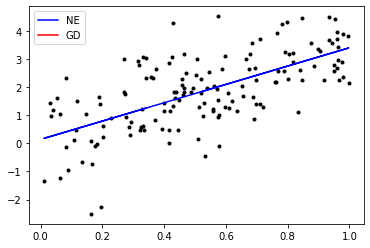

In [74]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()